In [1]:
# 📌 Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 📥 Load required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
file_path = '/content/drive/My Drive/complaints.csv'
df = pd.read_csv(file_path)

/tmp/ipython-input-3-3865693836.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [4]:
# 🧐 Initial EDA
print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns)
print("\nMissing values:\n", df.isnull().sum())
df.head()


Shape of dataset: (9609797, 18)

Column names: Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

Missing values:
 Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        839522
Consumer complaint narrative    6629041
Company public response         4770207
Company                               0
State                             54516
ZIP code                          30228
Tags                            8981029
Consumer consent provided?      1649561
Submitted via                         0
Date sent to company            

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


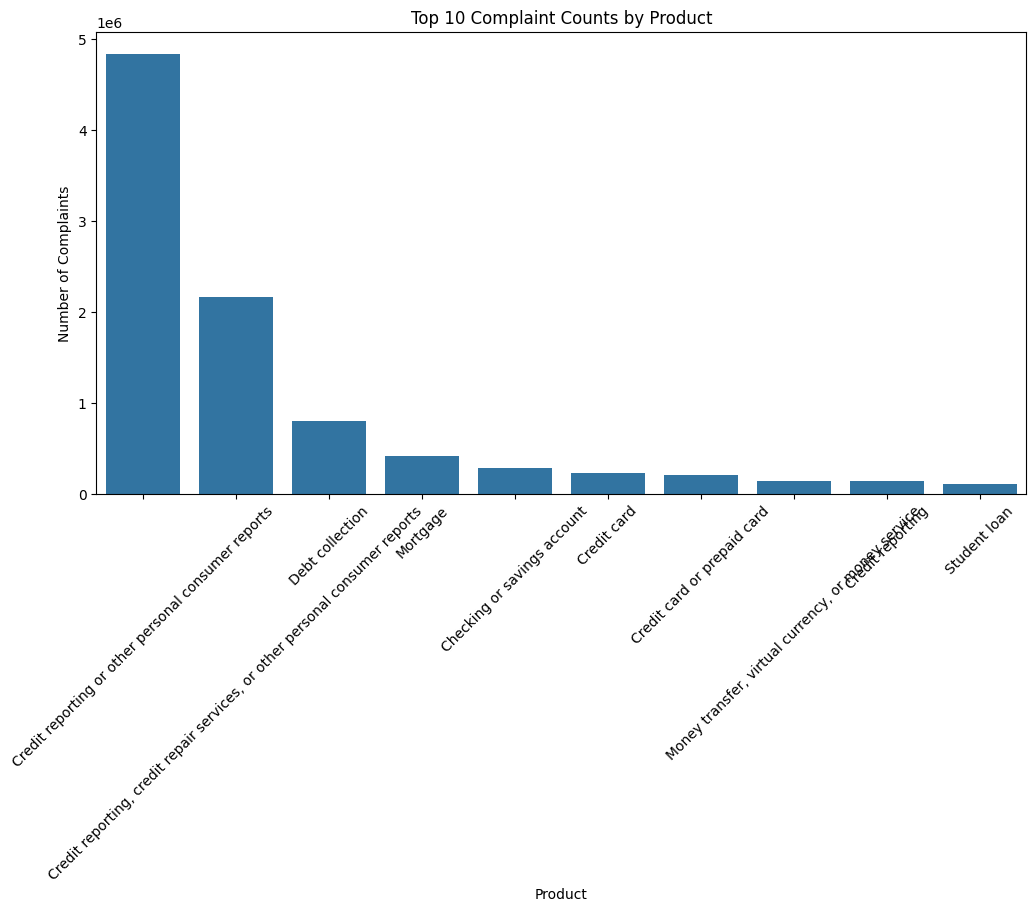

In [5]:
# 📊 Distribution of complaints by Product
plt.figure(figsize=(12,6))
product_counts = df['Product'].value_counts()
sns.barplot(x=product_counts.index[:10], y=product_counts.values[:10])
plt.xticks(rotation=45)
plt.title("Top 10 Complaint Counts by Product")
plt.ylabel("Number of Complaints")
plt.show()


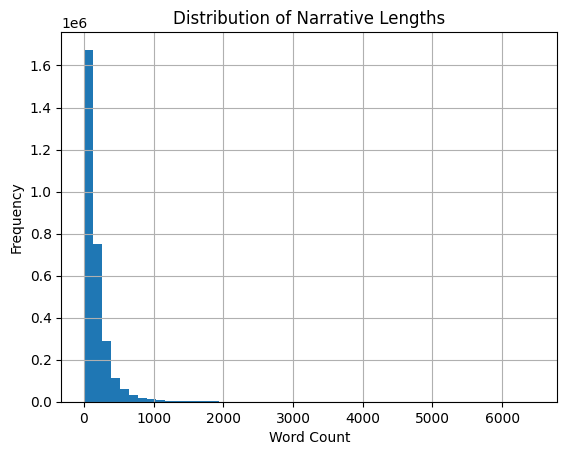

Shortest narrative length: 1.0
Longest narrative length: 6469.0


In [6]:
# 📏 Narrative length analysis
df['narrative_length'] = df['Consumer complaint narrative'].dropna().apply(lambda x: len(str(x).split()))
df['narrative_length'].hist(bins=50)
plt.title("Distribution of Narrative Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

print("Shortest narrative length:", df['narrative_length'].min())
print("Longest narrative length:", df['narrative_length'].max())


In [10]:
# 📌 Complaints with and without narratives
with_narrative = df['Consumer complaint narrative'].notnull().sum()
without_narrative = df['Consumer complaint narrative'].isnull().sum()

print(f"Complaints with narrative: {with_narrative}")
print(f"Complaints without narrative: {without_narrative}")


Complaints with narrative: 2980756
Complaints without narrative: 6629041


In [11]:
# 🎯 Filter by 5 target products & remove null narratives
target_products = [
    'Credit card',
    'Personal loan',
    'Buy Now, Pay Later (BNPL)',
    'Savings account',
    'Money transfer, virtual currency'
]

filtered_df = df[
    df['Product'].isin(target_products) &
    df['Consumer complaint narrative'].notnull()
].copy()

print(f"Filtered dataset size: {filtered_df.shape}")


Filtered dataset size: (80667, 19)


In [12]:
# 🧼 Clean text narratives
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'i am writing.*?complaint', '', text)  # remove boilerplate text if present
    text = re.sub(r'\s+', ' ', text).strip()
    return text

filtered_df['cleaned_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_text)


In [13]:
# 💾 Save cleaned dataset back to Drive
output_path = '/content/drive/My Drive/filtered_complaints.csv'
filtered_df.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to: {output_path}")


Cleaned dataset saved to: /content/drive/My Drive/filtered_complaints.csv
